### 这是一份数据分析报告

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns=["user_id","order_dt","order_products","order_amount"]

In [3]:
df=pd.read_table("CDNOW_master.txt",names=columns,sep="\s+")

In [4]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
df["order_dt"]=pd.to_datetime(df.order_dt,format="%Y%m%d")

In [6]:
df["month"]=df.order_dt.values.astype("datetime64[M]")

In [26]:
grouped_month=df.groupby("month")

In [27]:
order_month_amount=grouped_month.order_amount.sum()

In [28]:
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

In [29]:
%matplotlib inline

In [30]:
plt.style.use("ggplot")

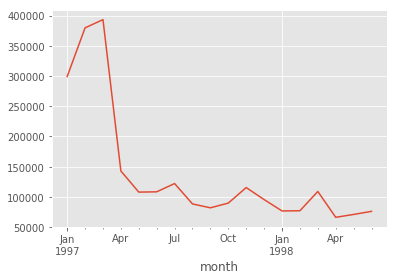

In [31]:
order_month_amount.plot()

In [33]:
grouped_month.apply(lambda x:len(x.user_id.drop_duplicates()))

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
dtype: int64

In [32]:
df.pivot_table(index="month",values="user_id",aggfunc="count")

,user_id
month,
1997-01-01,8928
1997-02-01,11272
1997-03-01,11598
1997-04-01,3781
1997-05-01,2895
1997-06-01,3054
1997-07-01,2942
1997-08-01,2320
1997-09-01,2296


In [44]:
grouped_month.user_id.apply(lambda x:len(x.drop_duplicates()))

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

In [56]:
df1=df.groupby(["month","user_id"]).count().reset_index("user_id")

In [57]:
df1.groupby("month").count()

,user_id,order_dt,order_products,order_amount
month,,,,
1997-01-01,7846,7846,7846,7846
1997-02-01,9633,9633,9633,9633
1997-03-01,9524,9524,9524,9524
1997-04-01,2822,2822,2822,2822
1997-05-01,2214,2214,2214,2214
1997-06-01,2339,2339,2339,2339
1997-07-01,2180,2180,2180,2180
1997-08-01,1772,1772,1772,1772
1997-09-01,1739,1739,1739,1739


In [62]:
df.groupby("user_id").sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


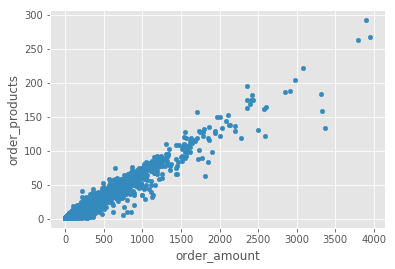

In [65]:
df.groupby("user_id").sum().query("order_amount<4000").plot.scatter(x="order_amount",y="order_products")

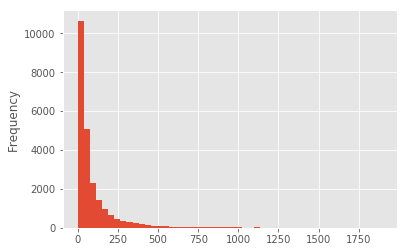

In [76]:
df.groupby("user_id").sum().query("order_products<100").order_amount.plot.hist(bins=50)

In [50]:
user_cumsum=df.groupby("user_id").sum().sort_values("order_amount").cumsum().order_amount.apply(lambda x:x/2500315.63)

In [51]:
user_cumsum

user_id
10175    0.000000
4559     0.000000
1948     0.000000
925      0.000000
10798    0.000000
19314    0.000000
21690    0.000000
10664    0.000000
4384     0.000000
6395     0.000000
19384    0.000000
23157    0.000000
455      0.000000
2556     0.000000
1987     0.000000
9853     0.000000
9835     0.000000
6920     0.000000
908      0.000000
9710     0.000000
13434    0.000000
19189    0.000000
12366    0.000000
16132    0.000000
5567     0.000000
5301     0.000000
11955    0.000000
11940    0.000000
1753     0.000000
18861    0.000000
           ...   
22492    0.950155
3901     0.951119
16175    0.952086
313      0.953059
710      0.954060
8250     0.955093
12098    0.956130
17337    0.957170
586      0.958310
2908     0.959475
21950    0.960668
20917    0.961899
21739    0.963227
1077     0.964557
14894    0.965902
12367    0.967421
13167    0.968980
22061    0.970560
2664     0.972200
16517    0.973873
15162    0.975567
3049     0.977272
499      0.979023
22279    0.980819
65

In [53]:
a


,index,user_id,order_amount
0,0,10175,0.000000
1,1,4559,0.000000
2,2,1948,0.000000
3,3,925,0.000000
4,4,10798,0.000000
5,5,19314,0.000000
6,6,21690,0.000000
7,7,10664,0.000000
8,8,4384,0.000000
9,9,6395,0.000000


In [52]:
a=a.reset_index()

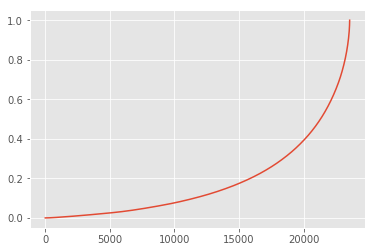

In [54]:
a.order_amount.plot()

In [14]:
type(df.groupby("month"))

pandas.core.groupby.groupby.DataFrameGroupBy

In [15]:
df.groupby("user_id").sum().apply(lambda x：x.order_amount.sum())

SyntaxError: invalid character in identifier (<ipython-input-15-605bbda468b1>, line 1)

In [16]:
df.groupby("user_id").sum().order_amount.sum()

2500315.63